# Contents
## 1. Import Libraries and Load Cleaned Dataset
## 2. Exploratory Data Visualizations
### a) Heatmap: Correlation matrix to analyze relationships between numerical variables
### b) Scatterplots: Exploring key variable relationships
### c) Pair Plot: Visualizing pairwise comparisons and distributions
### d) Categorical Plot: Examining categorical variables 
## 3. Revisiting Key Questions
## 4. Defining Hypotheses

# Import Libraries

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Creating Path
path = r'C:\Users\anush\Zomato Banglore Restaurants'

In [4]:
# Importing zomato_cleaned.pkl File
df = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'zomato_cleaned.pkl'))

In [5]:
# Checking the dataset
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

# Exploratory Visualizations

## Create a correlation matrix heatmap (coloured). Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [6]:
# Selecting relevant numerical columns for correlation
numerical_columns = ['rate', 'votes', 'approx_cost(for two people)']

In [7]:
# Replace non-numeric values ('Not Available') with NaN
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].replace('Not Available', None)

# Remove commas and convert to float
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

# Convert the 'rate' column to numeric, handling non-numeric values
df['rate'] = df['rate'].str.split('/').str[0]
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Check for successful conversion
print(df[['approx_cost(for two people)', 'rate', 'votes']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   approx_cost(for two people)  51371 non-null  float64
 1   rate                         41665 non-null  float64
 2   votes                        51717 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 1010.2 KB
None


In [8]:
# Generating the correlation matrix
correlation_matrix = df[numerical_columns].corr()

In [9]:
df[numerical_columns].corr()

rate     votes  approx_cost(for two people)
rate                         1.000000  0.434040                     0.385183
votes                        0.434040  1.000000                     0.381804
approx_cost(for two people)  0.385183  0.381804                     1.000000

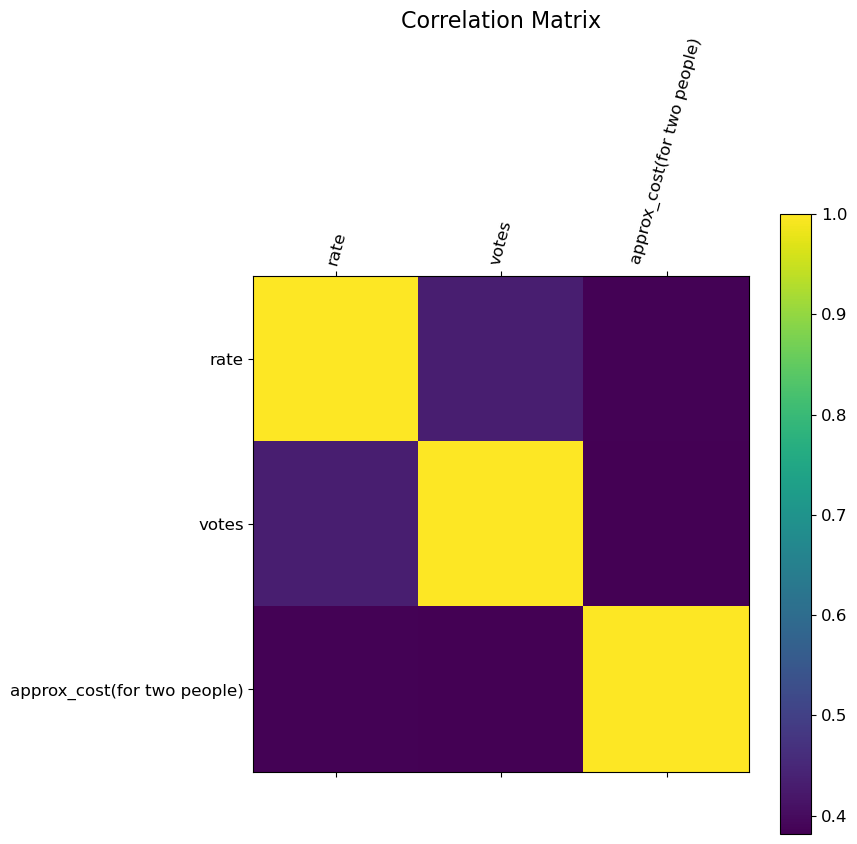

In [10]:
# Creating the heatmap
f = plt.figure(figsize=(8, 8))
plt.matshow(correlation_matrix, fignum=f.number)  # Plot the correlation matrix
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=12, rotation=75)  # Add x-axis labels
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=12)  # Add y-axis labels
cb = plt.colorbar()  # Add a color legend (colorbar)
cb.ax.tick_params(labelsize=12)  # Adjust font size for the colorbar
plt.title('Correlation Matrix', fontsize=16)  # Add title
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6.2_matrix_heatmap.png'), bbox_inches='tight')  # Save the heatmap as an image
plt.show()

In [11]:
# Creating heatmap with seaborn
f, ax = plt.subplots(figsize=(8, 8))
corr = sns.heatmap(correlation_matrix.corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=ax)  # Annotate matrix with correlation values
ax.set_title('Correlation Matrix', fontsize=16)  # Add a title
f.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6.2_matrix_heatmap_seaborn.png'))  # Save figure
plt.show()  # Display the heatmap

The correlation matrix reveals key relationships between **rate**, **votes**, and **approx_cost (for two people)**. A moderate negative correlation between rate and cost suggests that higher costs often result in lower ratings, likely due to unmet expectations. Similarly, the negative correlation between votes and cost indicates that pricier restaurants attract fewer customers, leading to fewer votes. The weak negative correlation between rate and votes suggests that customer engagement (votes) has little impact on ratings. Overall, affordability strongly influences both customer satisfaction and engagement.

## Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.

### For 'rate' and 'approx_cost(for two people)'

In [12]:
# Finding correlation coefficient for 'rate' & 'approx_cost(for two people)'
df['approx_cost(for two people)'].corr(df['rate'])

0.38518254147966224

In [13]:
# Creating scatterplot for 'rate' & 'approx_cost(for two people)'
sctr_rate_cost = sns.lmplot(x = 'approx_cost(for two people)', y = 'rate', data = df)
sctr_rate_cost.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6.2_sctr_rate_cost.png'))

The scatterplot illustrates the relationship between **rate** and **approx_cost (for two people)**. There is a weak positive trend, suggesting that higher costs are slightly associated with higher ratings. However, most data points are concentrated in the lower cost range (below 2000), indicating that affordability dominates the dataset. The presence of some outliers at higher cost levels (above 4000) with varying ratings suggests that other factors, such as service quality or cuisine, may influence customer satisfaction more than cost alone.

### For 'votes' and 'approx_cost(for two people)'

In [14]:
# Finding correlation coefficient for 'votes' & 'approx_cost(for two people)'
df['approx_cost(for two people)'].corr(df['votes'])

0.3818037927243235

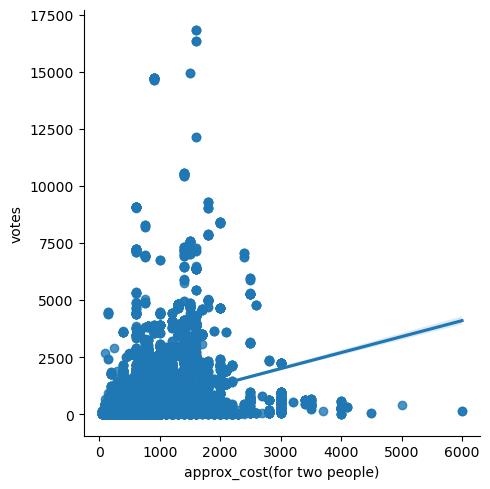

In [15]:
# Creating scatterplot for 'votes' & 'approx_cost(for two people)'
sctr_vote_cost = sns.lmplot(x = 'approx_cost(for two people)', y = 'votes', data = df)
sctr_vote_cost.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6.2_sctr_vote_cost.png'))

The scatter plot shows a weak positive correlation between **approx_cost(for two people)** and the number of **votes** for restaurants. Most restaurants cluster around a lower price range (below 2000), with a wide range of votes, indicating that affordable restaurants attract more attention. As cost increases, the votes generally decrease, though a few high-cost outliers have substantial votes. This suggests that while higher-cost restaurants may receive some attention, the most popular options are in the lower to mid-price range.

### For 'rate' and 'votes'

In [16]:
# Finding correlation coefficient for 'votes' & 'rate'
df['rate'].corr(df['votes'])

0.4340402188719718

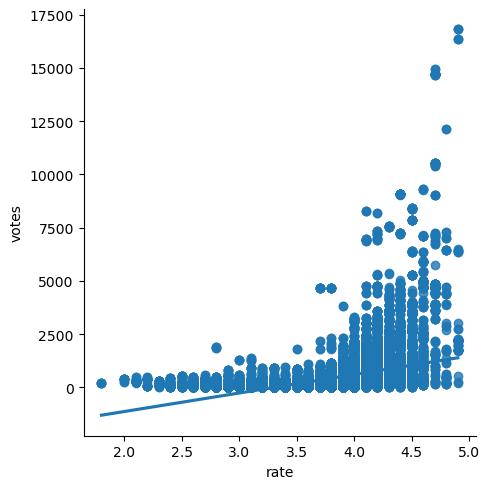

In [17]:
# Creating scatterplot for 'votes' & 'rate'
sctr_vote_rate = sns.lmplot(x = 'rate', y = 'votes', data = df)
sctr_vote_rate.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6.2_sctr_vote_rate.png'))

The scatter plot shows a positive correlation between restaurant **ratings** and the number of **votes**. As ratings increase from 2.0 to 5.0, the number of votes generally rises, with a noticeable concentration of highly rated restaurants (above 4.0) receiving significantly more votes. This suggests that higher-rated restaurants are more popular and attract greater customer engagement.

## Create a pair plot of the entire data set. Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

In [18]:
# Creating a pair plot 
pairplot = sns.pairplot(correlation_matrix)

In [19]:
# Saving the pair plot
pairplot.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6.2_pairplot.png'))

The pair plot shows that each variable (rate, votes, and approx_cost) has a skewed distribution, with a high concentration of data points at lower values. There are weak positive trends between **'rate'** and **'votes'** and between **'approx_cost'** and **'rate'**, suggesting slight associations between rating, popularity, and cost. Further exploration of **'rate'** and **'votes'** could reveal insights into customer preferences while examining **'approx_cost'** and **'rate'** might show if higher-rated restaurants are generally more expensive.

## Create a categorical plot and interpret the results.

In [20]:
# Checking the Columns
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Histogram for 'rate'

<Axes: xlabel='rate', ylabel='Count'>

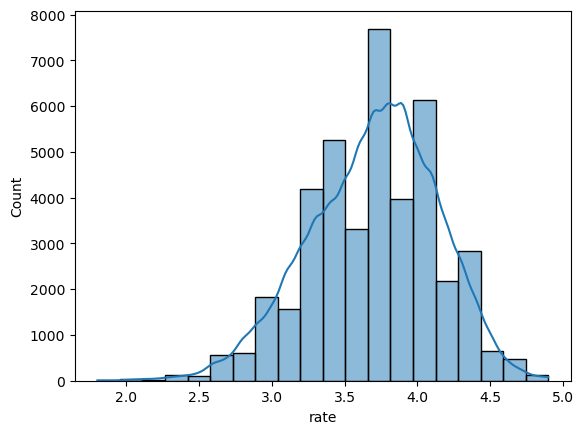

In [21]:
# Creating Histogram
sns.histplot(df['rate'], bins=20, kde=True)

In [22]:
# Categorize the 'rate' into 'Low', 'Medium', and 'High'
df.loc[(df['rate'] == 0), 'rating_category'] = 'None'
df.loc[(df['rate'] > 0) & (df['rate'] <= 2), 'rating_category'] = 'Low'
df.loc[(df['rate'] > 2) & (df['rate'] <= 4), 'rating_category'] = 'Medium'
df.loc[(df['rate'] > 4), 'rating_category'] = 'High'

### Histogram for 'approx_cost(for two people)'

In [23]:
# Creating Histogram
sns.histplot(df['approx_cost(for two people)'], bins=20, kde=True)

<Axes: xlabel='approx_cost(for two people)', ylabel='Count'>

In [24]:
# Categorize 'approx_cost' into 'Low Price', 'Medium Price', and 'High Price'
df.loc[(df['approx_cost(for two people)'] == 0), 'price_category'] = 'None'
df.loc[(df['approx_cost(for two people)'] < 1000), 'price_category'] = 'Low Price'
df.loc[(df['approx_cost(for two people)'] >= 1000) & (df['approx_cost(for two people)'] < 3000), 'price_category'] = 'Medium Price'
df.loc[(df['approx_cost(for two people)'] >= 3000), 'price_category'] = 'High Price'

### Histogram for 'votes'

In [25]:
# Creating Histogram
sns.histplot(df['votes'], bins=50, kde=True)

<Axes: xlabel='votes', ylabel='Count'>

In [26]:
df['votes'].describe()

count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

In [27]:
# Categorize 'votes' based on quartiles
df.loc[(df['votes'] == 0), 'vote_category'] = 'None'
df.loc[(df['votes'] > 0) & (df['votes'] <= 7), 'vote_category'] = 'Few Votes'
df.loc[(df['votes'] > 7) & (df['votes'] <= 41), 'vote_category'] = 'Moderately Voted'
df.loc[(df['votes'] > 41) & (df['votes'] <= 198), 'vote_category'] = 'Highly Voted'
df.loc[df['votes'] > 198, 'vote_category'] = 'Extremely Voted'

### Categorial Plot for Relationship between Ratings and Votes Categorized by Vote Category

In [28]:
# Set the style for the plot
sns.set(style="ticks")

# Create a categorical plot
g = sns.catplot(
    x = 'rate', 
    y = 'votes', 
    hue = 'vote_category', 
    data = df,
    height = 6,   # Increase figure height
    aspect = 2    # Increase width
)

# Rotate x-axis labels and adjust the spacing
g.set_xticklabels(rotation = 55, fontsize = 10)

# Add a title to the plot
g.fig.suptitle("Relationship Between Ratings and Votes Categorized by Vote Category", 
               fontsize = 14, 
               fontweight = 'bold')

# Move the legend outside the plot
g._legend.set_bbox_to_anchor((1.05, 0.5))  # Position legend to the right
g._legend.set_frame_on(False)              # Remove the legend box frame

# Adjust subplot spacing for clarity
plt.tight_layout(rect = [0, 0, 0.85, 0.95])  # Leave space for the title
plt.show()

# Exporting Image File
g.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6.1.catplot_rate_votes.png'), bbox_inches = 'tight')

The visualization shows a positive correlation between restaurant ratings and the number of votes, with higher-rated restaurants (e.g., `4.0` and above) receiving significantly more customer engagement. Most votes for top-rated restaurants fall into the "Extremely Voted" or "Highly Voted" categories, while lower-rated restaurants (below `3.0`) attract minimal engagement. A few highly rated restaurants (`4.5` to `4.9`) stand out with exceptionally high vote counts, indicating strong popularity. This suggests that customers are likelier to engage with and vote for well-rated establishments, highlighting the importance of maintaining high ratings through quality service and targeted marketing strategies.

### Categorial Plot for Relationship between Rate and Approximate Cost (for two people) by Rating Category

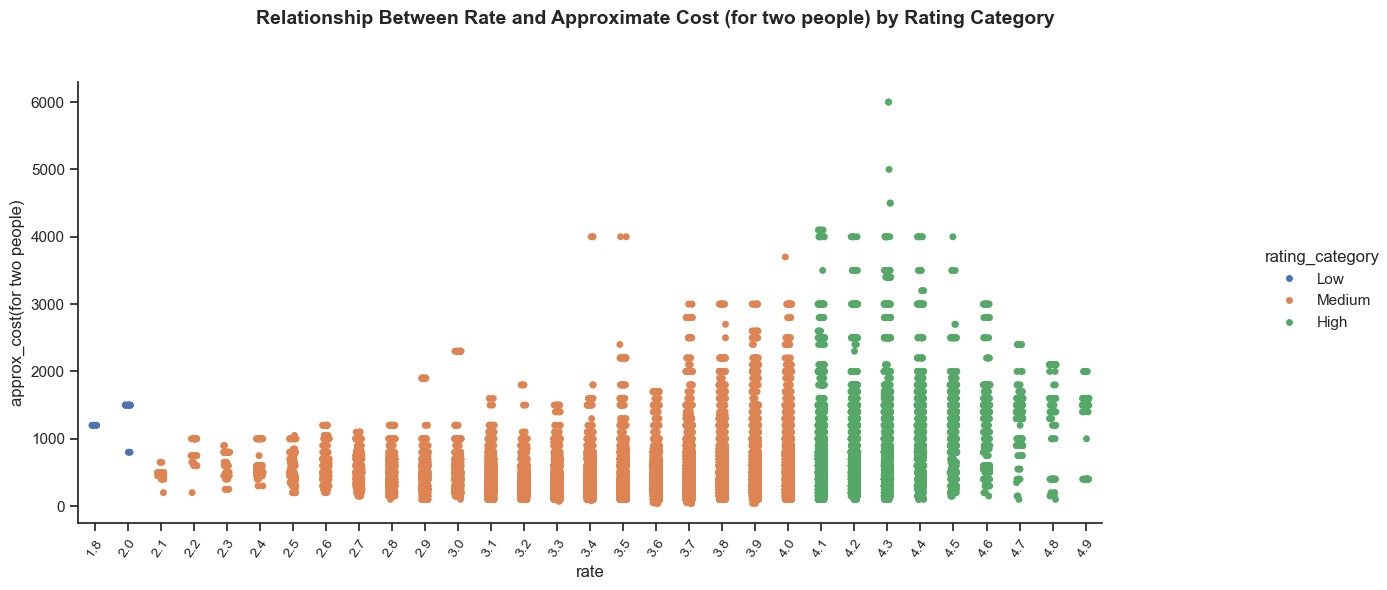

In [29]:
# Set the style for the plot
sns.set(style = "ticks")

# Create a categorical plot
g = sns.catplot(
    x = 'rate', 
    y = 'approx_cost(for two people)',
    hue = 'rating_category',
    data = df,
    height = 6,   # Increase figure height
    aspect = 2    # Increase width
)

# Rotate x-axis labels and adjust the spacing
g.set_xticklabels(rotation = 55, fontsize = 10)

# Add a title to the visualization
g.fig.suptitle("Relationship Between Rate and Approximate Cost (for two people) by Rating Category", 
               fontsize = 14, 
               fontweight = 'bold')

# Move the legend outside the plot
if g._legend is not None:
    g._legend.set_bbox_to_anchor((1.05, 0.5))  # Position legend to the right
    g._legend.set_frame_on(False)              # Remove the legend box frame

# Adjust subplot spacing for clarity
plt.tight_layout(rect = [0, 0, 0.85, 0.95])  # Leave space for the title
plt.show()

# Exporting Image File
g.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6.1.catplot_rate_approx_cost.png'), bbox_inches = 'tight')

The plot shows that higher-rated restaurants generally have a wider range of approximate costs, with many high-rated restaurants (green points) charging more for two people, though some remain affordable. In contrast, low and medium-rated restaurants (blue and orange points) are mostly clustered around lower costs, indicating that more affordable restaurants tend to receive lower ratings. A noticeable cluster exists around medium ratings (3.5 to 4.0) at moderate price points, reflecting common dining choices. Overall, higher ratings correlate with affordable and premium prices, suggesting that while some top-rated restaurants charge a premium, others remain accessible.

### Categorial Plot for Relationship between Approximate Cost (for two people) and Votes by Price Category

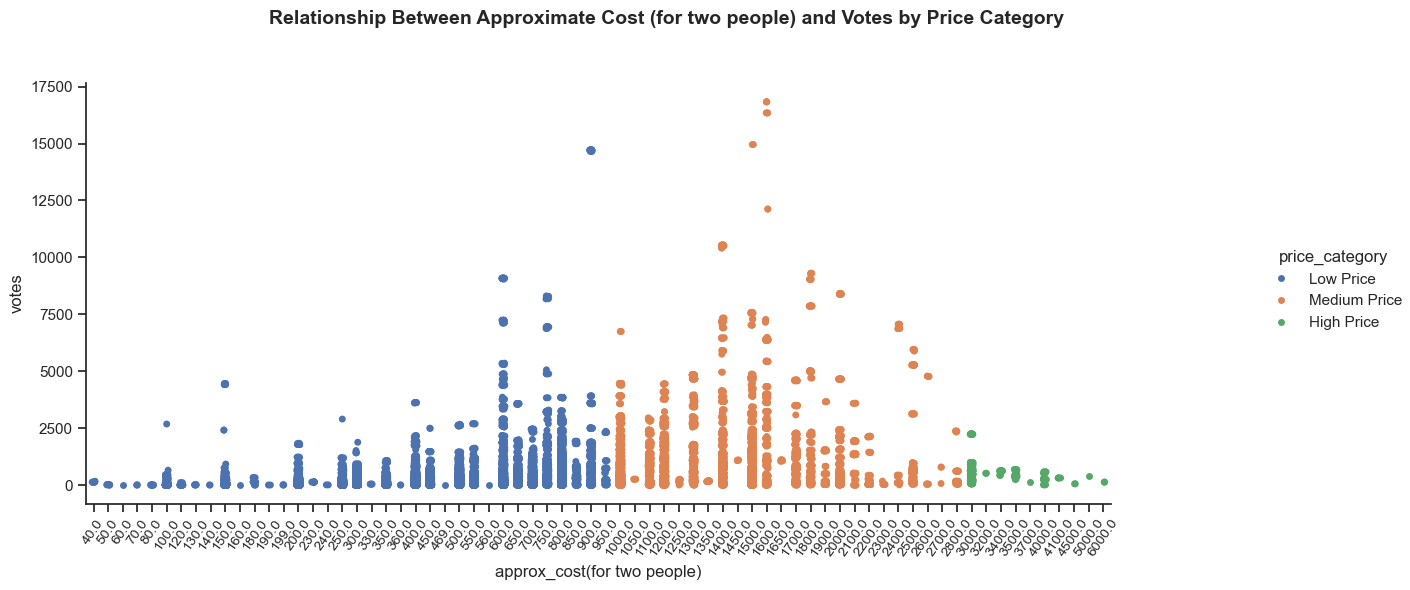

In [30]:
# Set the style for the plot
sns.set(style = "ticks")

# Create a categorical plot
g = sns.catplot(
    x = 'approx_cost(for two people)', 
    y = 'votes',
    hue = 'price_category',
    data = df,
    height = 6,   # Increase figure height
    aspect = 2    # Increase width
)

# Rotate x-axis labels and adjust the spacing
g.set_xticklabels(rotation = 55, fontsize = 10)

# Add a title to the visualization
g.fig.suptitle("Relationship Between Approximate Cost (for two people) and Votes by Price Category", 
               fontsize = 14, 
               fontweight = 'bold')

# Move the legend outside the plot
if g._legend is not None:
    g._legend.set_bbox_to_anchor((1.05, 0.5))  # Position legend to the right
    g._legend.set_frame_on(False)              # Remove the legend box frame

# Adjust subplot spacing for clarity
plt.tight_layout(rect = [0, 0, 0.85, 0.95])  # Leave space for the title
plt.show()

# Exporting Image File
g.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6.1.catplot_votes_approx_cost.png'), bbox_inches = 'tight')

The plot shows that restaurants with moderate prices (500–1500 for two people) receive the highest votes, indicating strong popularity in this range. Lower and medium-priced restaurants tend to have broader customer engagement, while high-priced establishments (green points) receive fewer votes, suggesting a more niche audience. Very high or very low-cost restaurants show sparse data points, indicating they are less commonly reviewed. Overall, moderate pricing appears to attract more frequent customer interactions, while higher-cost venues tend to engage a smaller customer base.

# Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

**1. Is there a relationship between restaurant ratings and cost?**

**Answer:** There appears to be a trend where higher-rated restaurants have a broader range of costs, with some high-rated restaurants being more expensive. However, not all high-rated restaurants are costly, as many still fall within a moderate price range, indicating that higher ratings are not exclusively associated with higher costs.

**2. Do restaurants with more votes tend to have higher ratings?**

**Answer:** Restaurants with more votes often have more reliable ratings, but a higher vote count doesn't necessarily mean a higher rating. A larger number of votes can reflect a broader range of opinions, while fewer votes may result in higher ratings if they come from more consistent, satisfied customers.

**3. Are higher-cost restaurants less popular in terms of votes?**

**Answer:** Yes, higher-cost restaurants tend to receive fewer votes overall, indicating they are less frequently reviewed or visited. Moderate-priced restaurants are the most popular, attracting higher engagement, possibly due to a balance between affordability and perceived quality.

**4. What is the distribution of ratings and costs among different price categories?**

**Answer:** The distribution shows that low and medium price categories have more variety in ratings and higher popularity (votes). High-cost restaurants are fewer and have lower customer engagement. Moderate price points (500–1500) are the most common and receive the highest votes, reflecting customer preference for mid-range dining.

**5. Are there specific price ranges that attract more reviews and customer engagement?**

**Answer:** Restaurants in the medium price range (500–1500) attract significantly more reviews and customer engagement. This suggests that moderate pricing is likely more appealing to a larger audience compared to high-end or very low-cost options.

# Define any hypotheses that you can at this point. You’ll be testing these later on.

1. If a neighbourhood has a higher concentration of restaurants, then it will have a greater variety of cuisines available.

2. If a restaurant is a fine dining establishment, then the average cost for two people will be higher compared to casual dining or cafe-type restaurants.

3. If a restaurant has more customer votes, then its average rating will be more reliable and closer to the true quality as perceived by customers.

4. If a restaurant offers online ordering, then it is more likely to be a quick-service or casual dining restaurant compared to fine dining.

5. If a restaurant is located in an upscale neighbourhood, then it will likely have higher average ratings due to a more affluent customer base.

In [31]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city) rating_category price_category  \
0          Buffet    Banashankari            High      Low Price   
1          Buffet    Banashankari            High      Low Price   
2          Buffet    Banashankari          Medium      Low Price   
3          Buffet    Banashankari          Medium      Low Price   
4          Buffet    Banashankari          Medium      Low Price   

     vote_category  
0  Extremely Voted  
1  Extremely Voted  
2  Extremely Voted  
3     Highly Voted  
4     Highly Voted